# Creating Model using Transfer Learning

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Malaria_dataset/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Malaria_dataset/Test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [ ]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Malaria_dataset/*')

In [ ]:
len(folders)

2

In [ ]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Malaria_dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Malaria_dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 173s 11s/step - loss: 2.4816 - accuracy: 0.5529 - val_loss: 0.6485 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 5s 381ms/step - loss: 0.6856 - accuracy: 0.5793 - val_loss: 0.6724 - val_accuracy: 0.6716
Epoch 3/50
13/13 [==============================] - 5s 387ms/step - loss: 0.6131 - accuracy: 0.6442 - val_loss: 0.7199 - val_accuracy: 0.4851
Epoch 4/50
13/13 [==============================] - 5s 390ms/step - loss: 0.5129 - accuracy: 0.7284 - val_loss: 0.8274 - val_accuracy: 0.4328
Epoch 5/50
13/13 [==============================] - 5s 383ms/step - loss: 0.6139 - accuracy: 0.6851 - val_loss: 0.7167 - val_accuracy: 0.6791
Epoch 6/50
13/13 [==============================] - 5s 380ms/step - loss: 0.6231 - accuracy: 0.6899 - val_loss: 0.7944 - val_accuracy: 0.5597
Epoch 7/50
13/13 [==============================] - 5s 378ms/step - loss: 0.5839 - accuracy: 0.6635 - val_loss: 0.7782 - val_accuracy: 0.3731
Epoch 

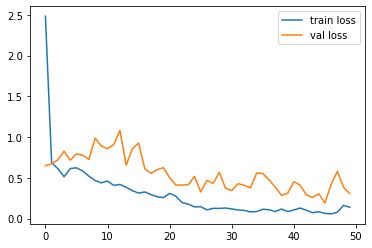

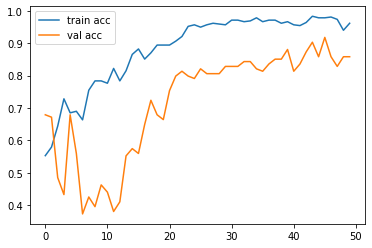

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [64]:
# save it as a h5 file



# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("Malaria.model", save_format="h5")

[INFO] saving mask detector model...


In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[9.9746966e-01, 2.5303105e-03],
       [9.9999809e-01, 1.9656577e-06],
       [6.0003124e-02, 9.3999684e-01],
       [5.1470470e-02, 9.4852948e-01],
       [3.7844360e-02, 9.6215564e-01],
       [9.7543441e-02, 9.0245658e-01],
       [4.5949399e-02, 9.5405060e-01],
       [9.9496055e-01, 5.0394936e-03],
       [9.1794550e-01, 8.2054570e-02],
       [9.9480516e-01, 5.1948335e-03],
       [1.2280787e-01, 8.7719214e-01],
       [4.0956624e-02, 9.5904344e-01],
       [4.0827457e-02, 9.5917249e-01],
       [9.5491070e-01, 4.5089304e-02],
       [1.3485643e-01, 8.6514360e-01],
       [1.0000000e+00, 6.7884804e-09],
       [9.9909604e-01, 9.0394064e-04],
       [5.7327744e-02, 9.4267219e-01],
       [1.5613961e-01, 8.4386045e-01],
       [3.9769182e-01, 6.0230821e-01],
       [9.9999988e-01, 8.3632067e-08],
       [4.2173955e-01, 5.7826042e-01],
       [9.9982929e-01, 1.7068666e-04],
       [9.2712289e-01, 7.2877072e-02],
       [1.0000000e+00, 2.0891199e-17],
       [9.9724138e-01, 2.

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1])